In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random, math
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from sklearn.model_selection import train_test_split
import os
import time
import datetime
import re
import glob
from sklearn import metrics
import seaborn as sns

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

"""
Read set of file
"""

folder_name = 'D:\Data Set\Set2'
file_type = 'csv'
seperator =','
df = pd.concat([pd.read_csv(f,sep=seperator) for f in glob.glob(folder_name + "/*."+file_type)],ignore_index=True)
"""

df = df.iloc[0:0]
df = pd.read_csv ('D:\Data Set\Set1\ds_vol-all_pm_2019-12-12_18_00.csv')   #read the csv file (put 'r' before the path string to address any special characters, such as '\'). Don't forget to put the file name at the end of the path + ".csv"

df2 = pd.read_csv ('D:\Data Set\Set1\ds_vol-all_pm_2019-12-12_17L_00.csv') 
df = df.append(df2)
df.shape
df.dtypes"""
print(df)
#df.append(df2)#, ignore_index=True)
#Add index value
#df.reset_index(inplace=True)
#print(df2)



            EPOCH        reads         readBytes  nsReadsHitMem  \
0      1576162800     49885463     5347399971328        6635123   
1      1576162860     49885463     5347399971328        6635123   
2      1576162920     49885463     5347399971328        6635123   
3      1576162980     49885463     5347399971328        6635123   
4      1576163040     49885463     5347399971328        6635123   
5      1576163100     49885463     5347399971328        6635123   
6      1576163160     49885463     5347399971328        6635123   
7      1576163220     49885463     5347399971328        6635123   
8      1576163280     49885463     5347399971328        6635123   
9      1576163340     49885463     5347399971328        6635123   
10     1576163400     49885463     5347399971328        6635123   
11     1576163460     49885463     5347399971328        6635123   
12     1576163520     49885463     5347399971328        6635123   
13     1576163580     49885463     5347399971328        663512

In [2]:
#Data Preprocessing 
#Extracting Date and time from Epoch value
#df.drop([:,:1])

y = df.iloc[:,[1]]
#print(y)
df1 = df
df2 = y

#df2.columns = ["date"]
#df1.date = df1.date.apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d %H:%M:%S'))
#df2.date = df2.date.apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%H'))
#df.insert(1, 'Hours', df2.date)

df1.date = pd.to_datetime(df1["EPOCH"], unit='s')
                  

#df1.columns = ["date"]
#df1.date = df1.date.apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%m-%d-%Y'))
df.insert(1, 'Date', df1.date)


# Create features for year, month, day, hour, and minute 
df['year'] = df['Date'].dt.year 
df['month'] = df['Date'].dt.month 
df['day'] = df1['Date'].dt.day 
df['hour'] = df1['Date'].dt.hour 
df['minute'] = df1['Date'].dt.minute 
df.set_index('Date',inplace=True)
print(df)


#code will convert the date into numerical value:
"""
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

df2 = df.iloc[:,[2]]
df2.columns = "EPOCH"
#df1.date = df1.date.apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d %H:%M:%S'))
df2.date = df2.date.apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%H'))
df.insert(1, 'Hours', df2.date)

"""
#print(df)
#Get X Values
y=df.iloc[:,[1,2]]
x = df.iloc[:,[3,4,7,8]]
#print(y)


#dt = datetime.datetime.strptime(line, '%Y-%m-%d %H:%M:%S.%f%z')
#print(dt)

#Convert Date and Time
#epoch_date_str = df[["EPOCH"]]
#epoch = str(time.mktime(time.strptime(date_time, pattern)))
#dt = datetime.datetime.strptime(y, '%Y-%m-%d %H:%M:%S.%f%z')
#print(dt)

                          EPOCH        reads         readBytes  nsReadsHitMem  \
Date                                                                            
2019-12-12 15:00:00  1576162800     49885463     5347399971328        6635123   
2019-12-12 15:01:00  1576162860     49885463     5347399971328        6635123   
2019-12-12 15:02:00  1576162920     49885463     5347399971328        6635123   
2019-12-12 15:03:00  1576162980     49885463     5347399971328        6635123   
2019-12-12 15:04:00  1576163040     49885463     5347399971328        6635123   
2019-12-12 15:05:00  1576163100     49885463     5347399971328        6635123   
2019-12-12 15:06:00  1576163160     49885463     5347399971328        6635123   
2019-12-12 15:07:00  1576163220     49885463     5347399971328        6635123   
2019-12-12 15:08:00  1576163280     49885463     5347399971328        6635123   
2019-12-12 15:09:00  1576163340     49885463     5347399971328        6635123   
2019-12-12 15:10:00  1576163

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


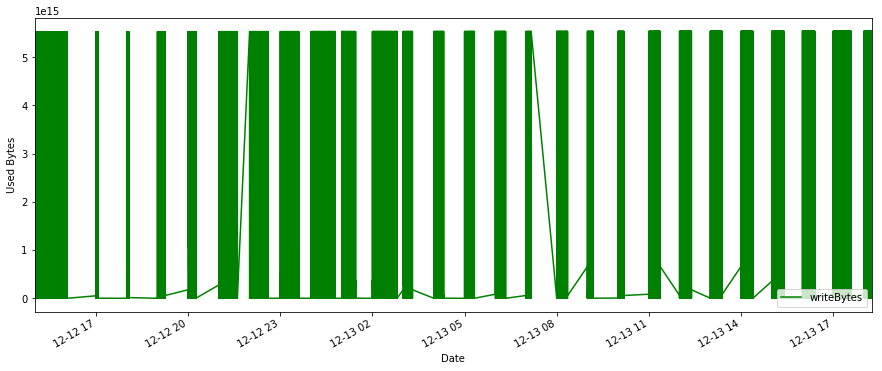

'"\ndft = pd.DataFrame(np.random.randn(100000, 1), columns=[\'Date\'],\n        index=pd.date_range(\'20191212\', periods=100000,freq=\'T\'))\nprint(dft)\n#print(dft[\'2019-12-10\'])\ndft1 = pd.DataFrame([], index=pd.DatetimeIndex(df[\'Date\']))#,tz=\'US/Pacific\'\n#print(dft1)\n#dft2 = pd.DataFrame(np.random.randn(1000, 4),index=dft1.index, columns=list(\'ABCD\'))\ndft2 = dft.cumsum()\ndf2.plot(legend=True)'

In [4]:
"""
dti = pd.date_range('2018-01-01', periods=3, freq='H')
#print(dti)
pd.to_datetime(['2005/11/23', '2010.12.31'])
#print(pd.DatetimeIndex(df['Date']))

"""
df['writeBytes'].plot(figsize=(15,6), color="green")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Used Bytes')
plt.show()

"""start = df['Date'].datetime(2019, 12, 12)
end = df['Date'].datetime(2019, 12, 13)
index = pd.date_range(start, end)
print(index)"""
""""
dft = pd.DataFrame(np.random.randn(100000, 1), columns=['Date'],
        index=pd.date_range('20191212', periods=100000,freq='T'))
print(dft)
#print(dft['2019-12-10'])
dft1 = pd.DataFrame([], index=pd.DatetimeIndex(df['Date']))#,tz='US/Pacific'
#print(dft1)
#dft2 = pd.DataFrame(np.random.randn(1000, 4),index=dft1.index, columns=list('ABCD'))
dft2 = dft.cumsum()
df2.plot(legend=True)"""

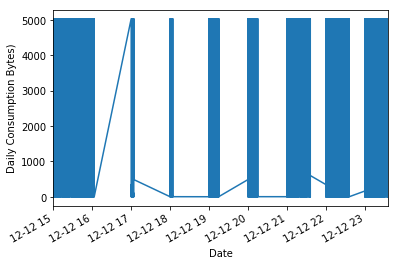

In [5]:
#code will convert the date into numerical value:

#df['Date'] = pd.to_datetime(df['Date'])
#df['ExchangeDate']=df['Date'].map(dt.datetime.toordinal)
#df.loc['2019-12-13']
#print(df.truncate(before='2019-12-12'))

#print(df.loc[df['Date']=='2019-12-13'])
df['writeTeraBytes']=df['writeBytes'].div(1099511627776)#-Tera Byte //(1073741824)-Giga Byte
df['readTeraBytes']=df['readBytes'].div(1099511627776)

ax = df.loc['2019-12-12', 'writeTeraBytes'].plot()
ax.set_ylabel('Daily Consumption Bytes)');
#print(df['writeGigaBytes'])
#print(df[['readTeraBytes','writeTeraBytes']])

In [54]:
"""
df2 = df.iloc[:,[3]]
df2.columns = "date"
#df1.date = df1.date.apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d %H:%M:%S'))
df2.date = df2.date.apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%H'))
df.insert(1, 'Hours', df2.date)
"""
#print(df)
#print(df.dtypes)
df.reset_index(inplace=True)
print(df)
selecteddf = df[['Date','month','day','hour','minute','reads','readTeraBytes','writes','writeTeraBytes','RECORD_MISSING']]
selected_df1 = selecteddf[['Date','readTeraBytes','writeTeraBytes']]
selected_df1.dtypes
#print(selected_df1)

       level_0  index                Date       EPOCH        reads  \
0            0      0 2019-12-12 15:00:00  1576162800     49885463   
1            1      1 2019-12-12 15:01:00  1576162860     49885463   
2            2      2 2019-12-12 15:02:00  1576162920     49885463   
3            3      3 2019-12-12 15:03:00  1576162980     49885463   
4            4      4 2019-12-12 15:04:00  1576163040     49885463   
5            5      5 2019-12-12 15:05:00  1576163100     49885463   
6            6      6 2019-12-12 15:06:00  1576163160     49885463   
7            7      7 2019-12-12 15:07:00  1576163220     49885463   
8            8      8 2019-12-12 15:08:00  1576163280     49885463   
9            9      9 2019-12-12 15:09:00  1576163340     49885463   
10          10     10 2019-12-12 15:10:00  1576163400     49885463   
11          11     11 2019-12-12 15:11:00  1576163460     49885463   
12          12     12 2019-12-12 15:12:00  1576163520     49885463   
13          13     1

Date              datetime64[ns]
readTeraBytes            float64
writeTeraBytes           float64
dtype: object

In [7]:
#Data Preprocessing 
#Replacing the zero values with mean in Record misssing column

mean_recordmissing=selecteddf.loc[:,"RECORD_MISSING"].mean()
print(mean_recordmissing)
#Then replace the zero values with this mean :

selecteddf['RECORD_MISSING']= selecteddf['RECORD_MISSING'].replace(0,mean_recordmissing)
selecteddf.head(260)



0.0


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,month,day,hour,minute,reads,readTeraBytes,writes,writeTeraBytes,RECORD_MISSING
0,2019-12-12 15:00:00,12,12,15,0,49885463,4.863432,7061958300,105.721285,0
1,2019-12-12 15:01:00,12,12,15,1,49885463,4.863432,7061960616,105.721303,0
2,2019-12-12 15:02:00,12,12,15,2,49885463,4.863432,7061962893,105.721320,0
3,2019-12-12 15:03:00,12,12,15,3,49885463,4.863432,7061965242,105.721338,0
4,2019-12-12 15:04:00,12,12,15,4,49885463,4.863432,7061967540,105.721355,0
5,2019-12-12 15:05:00,12,12,15,5,49885463,4.863432,7061969895,105.721372,0
6,2019-12-12 15:06:00,12,12,15,6,49885463,4.863432,7061972215,105.721389,0
7,2019-12-12 15:07:00,12,12,15,7,49885463,4.863432,7061974513,105.721406,0
8,2019-12-12 15:08:00,12,12,15,8,49885463,4.863432,7061976881,105.721423,0
9,2019-12-12 15:09:00,12,12,15,9,49885463,4.863432,7061979164,105.721440,0


0           4.863432
1           4.863432
2           4.863432
3           4.863432
4           4.863432
5           4.863432
6           4.863432
7           4.863432
8           4.863432
9           4.863432
10          4.863432
11          4.863432
12          4.863432
13          4.863432
14          4.863432
15          4.863432
16          4.863432
17          4.863432
18          4.863432
19          4.863432
20          4.863432
21          4.863432
22          4.863432
23          4.863432
24          4.863432
25          4.863432
26          4.863432
27          4.863432
28          4.863432
29          4.863432
            ...     
26334    1928.000026
26335    1928.000026
26336    1928.000026
26337    1928.000026
26338    1928.000026
26339    1928.000026
26340    1928.000026
26341    1928.000026
26342    1928.000026
26343    1928.000026
26344    1928.000026
26345    1928.000026
26346    1928.000026
26347    1928.000026
26348       0.007166
26349       0.007166
26350       0

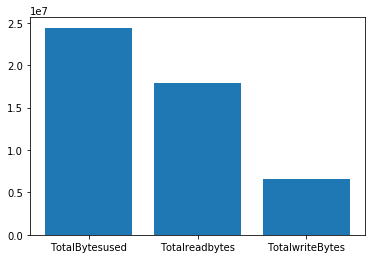

In [8]:
#visualisation of number of bytes used
 
Totalreadbytes = selecteddf['readTeraBytes'].sum()
print(selecteddf['readTeraBytes'])
print(Totalreadbytes)
TotalwriteBytes = selecteddf['writeTeraBytes'].sum()
print (TotalwriteBytes)
Totalbytesused=Totalreadbytes+TotalwriteBytes
print(Totalbytesused)

 
# Make a fake dataset:
height = [Totalbytesused, Totalreadbytes, TotalwriteBytes]
bars = ('TotalBytesused', 'Totalreadbytes', 'TotalwriteBytes')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

(167638438679662, 98207775867159, 44969454673599, 13594836197948, 4954682759960, 5345211825449, 329561140880, 140349081485, 85539008095, 8918903335, 1238688487, 546333006, 283083898, 28030634, 3705156, 5633108, 986960, 0, 0)


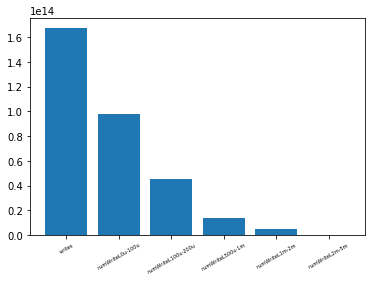

In [49]:
#visualisation for writes 
selecteddf = df[['writes','numWriteL0u-100u','numWriteL100u-200u','numWriteL200u-500u','numWriteL500u-1m','numWriteL1m-2m',
                 'numWriteL2m-5m','numWriteL5m-10m','numWriteL10m-20m','numWriteL20m-50m','numWriteL50m-100m',
                 'numWriteL100m-200m','numWriteL200m-500m','numWriteL500m-1s','numWriteL1s-2s','numWriteL2s-5s',
                 'numWriteL5s-10s','numWriteL10s-20s','numWriteL20s-30s']]
selecteddf.head(5)
writes = df['writes'].sum()
numWriteL0uto100u = df['numWriteL0u-100u'].sum()
numWriteL100uto200u = df['numWriteL100u-200u'].sum()
numWriteL200uto500u = df['numWriteL200u-500u'].sum()
numWriteL500uto1m = df['numWriteL500u-1m'].sum()
numWriteL1mto2m = df['numWriteL1m-2m'].sum()
numWriteL2mto5m = df['numWriteL2m-5m'].sum()
numWriteL5mto10m = df['numWriteL5m-10m'].sum()
numWriteL10mto20m = df['numWriteL10m-20m'].sum()
numWriteL20mto50m = df['numWriteL20m-50m'].sum()
numWriteL50mto100m = df['numWriteL50m-100m'].sum()
numWriteL100mto200m = df['numWriteL100m-200m'].sum()
numWriteL200mto500m = df['numWriteL200m-500m'].sum()
numWriteL500mto1s = df['numWriteL500m-1s'].sum()
numWriteL1sto2s = df['numWriteL1s-2s'].sum()
numWriteL2sto5s = df['numWriteL2s-5s'].sum()
numWriteL5sto10s = df['numWriteL5s-10s'].sum()
numWriteL10sto20s = df['numWriteL10s-20s'].sum()
numWriteL20sto30s = df['numWriteL20s-30s'].sum()

print(writes,numWriteL0uto100u,numWriteL100uto200u,numWriteL200uto500u,numWriteL500uto1m,numWriteL1mto2m,numWriteL2mto5m,numWriteL5mto10m,numWriteL10mto20m,numWriteL20mto50m,numWriteL50mto100m,numWriteL100mto200m,numWriteL200mto500m,numWriteL500mto1s,numWriteL1sto2s,numWriteL2sto5s,numWriteL5sto10s,numWriteL10sto20s,numWriteL20sto30s)
x= writes
y= numWriteL0uto100u,numWriteL100uto200u,numWriteL200uto500u,numWriteL500uto1m,numWriteL1mto2m,numWriteL2mto5m

height = [writes,numWriteL0uto100u,numWriteL100uto200u,numWriteL200uto500u,numWriteL500uto1m,numWriteL2mto5m]

#bars = ('writes','numWriteL0u-100u','numWriteL100u-200u','numWriteL200u-500u','numWriteL500u-1m','numWriteL1m-2m',
#                 'numWriteL2m-5m','numWriteL5m-10m','numWriteL10m-20m','numWriteL20m-50m','numWriteL50m-100m',
#                 'numWriteL100m-200m','numWriteL200m-500m','numWriteL500m-1s','numWriteL1s-2s','numWriteL2s-5s',
#                 'numWriteL5s-10s','numWriteL10s-20s','numWriteL20s-30s')
bars=('writes','numWriteL0u-100u','numWriteL100u-200u','numWriteL500u-1m','numWriteL1m-2m','numWriteL2m-5m')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, fontsize=5, rotation=30)

 
# Show graphic
plt.show()


(386400368942759, 136790327728118, 25690222896642, 100933294005585, 77504043940123, 29526308632829, 9945571672290, 2255608889002, 2460242426531, 1102514492798)


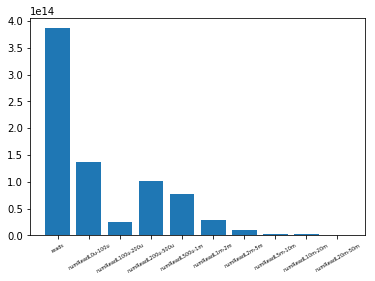

In [51]:

#visualisation for reads Time taken
selecteddf = df[['reads','numReadL0u-100u','numReadL100u-200u','numReadL200u-500u','numReadL500u-1m',
                 'numReadL1m-2m','numReadL2m-5m','numReadL5m-10m','numReadL10m-20m','numReadL20m-50m',
                 'numReadL50m-100m','numReadL100m-200m','numReadL200m-500m','numReadL500m-1s','numReadL1s-2s',
                 'numReadL2s-5s','numReadL5s-10s','numReadL10s-20s','numReadL20s-30s','numReadL30s-max']]
selecteddf.head()
reads = df['reads'].sum()
numReadL0uto100u = df['numReadL0u-100u'].sum()
numReadL100uto200u = df['numReadL100u-200u'].sum()
numReadL200uto500u = df['numReadL200u-500u'].sum()
numReadL500uto1m = df['numReadL500u-1m'].sum()
numReadL1mto2m = df['numReadL1m-2m'].sum()
numReadL2mto5m = df['numReadL2m-5m'].sum()
numReadL5mto10m = df['numReadL5m-10m'].sum()
numReadL10mto20m = df['numReadL10m-20m'].sum()
numReadL20mto50m = df['numReadL20m-50m'].sum()
numReadL50mto100m = df['numReadL50m-100m'].sum()
numReadL100mto200m = df['numReadL100m-200m'].sum()
numReadL200mto500m = df['numReadL200m-500m'].sum()
numReadL500mto1s = df['numReadL500m-1s'].sum()
numReadL1sto2s = df['numReadL1s-2s'].sum()
numReadL2sto5s = df['numReadL2s-5s'].sum()
numReadL5sto10s = df['numReadL5s-10s'].sum()
numReadL10sto20s = df['numReadL10s-20s'].sum()
numReadL20sto30s = df['numReadL20s-30s'].sum()
numReadL30stomax = df['numReadL30s-max'].sum()

print(reads,numReadL0uto100u,numReadL100uto200u,numReadL200uto500u,numReadL500uto1m,numReadL1mto2m,numReadL2mto5m,numReadL5mto10m,numReadL10mto20m,numReadL20mto50m)
x= reads
y= numReadL0uto100u,numReadL100uto200u,numReadL200uto500u,numReadL500uto1m,numReadL1mto2m,numReadL2mto5m,numReadL5mto10m,numReadL10mto20m,numReadL20mto50m

height = [reads,numReadL0uto100u,numReadL100uto200u,numReadL200uto500u,numReadL500uto1m,numReadL1mto2m,numReadL2mto5m,numReadL5mto10m,numReadL10mto20m,numReadL20mto50m]
bars=('reads','numReadL0u-100u','numReadL100u-200u','numReadL200u-500u','numReadL500u-1m','numReadL1m-2m','numReadL2m-5m','numReadL5m-10m','numReadL10m-20m','numReadL20m-50m')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, fontsize=5, rotation=30)

 
# Show graphic
plt.show()




27288777653282173
7658821171396
6154522663199872
4064618032644


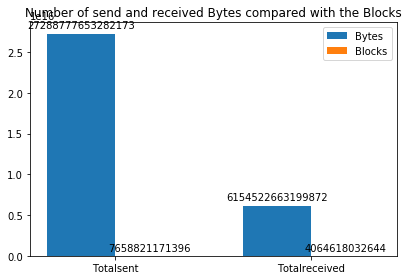

In [55]:
#visualisation of number of sent and received databytes

Totalsentbytes = df['replTxDataBytes'].sum()
print (Totalsentbytes)
Totalsentbytesblocks = df['replTxBlocks'].sum()
print (Totalsentbytesblocks)
TotalreceivedBytes = df['replRxDataBytes'].sum()
print (TotalreceivedBytes)
TotalreceivedBytesblocks = df['replRxBlocks'].sum()
print (TotalreceivedBytesblocks)
 

labels = ['Totalsent', 'Totalreceived']
sent_means = [Totalsentbytes, TotalreceivedBytes]
received_means = [Totalsentbytesblocks, TotalreceivedBytesblocks]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sent_means, width, label='Bytes')
rects2 = ax.bar(x + width/2, received_means, width, label='Blocks')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('')
ax.set_title('Number of send and received Bytes compared with the Blocks')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

[Text(0,0.5,'Used Bytes'), Text(0.5,0,'Date'), Text(0.5,1,'No of Bytes Used')]

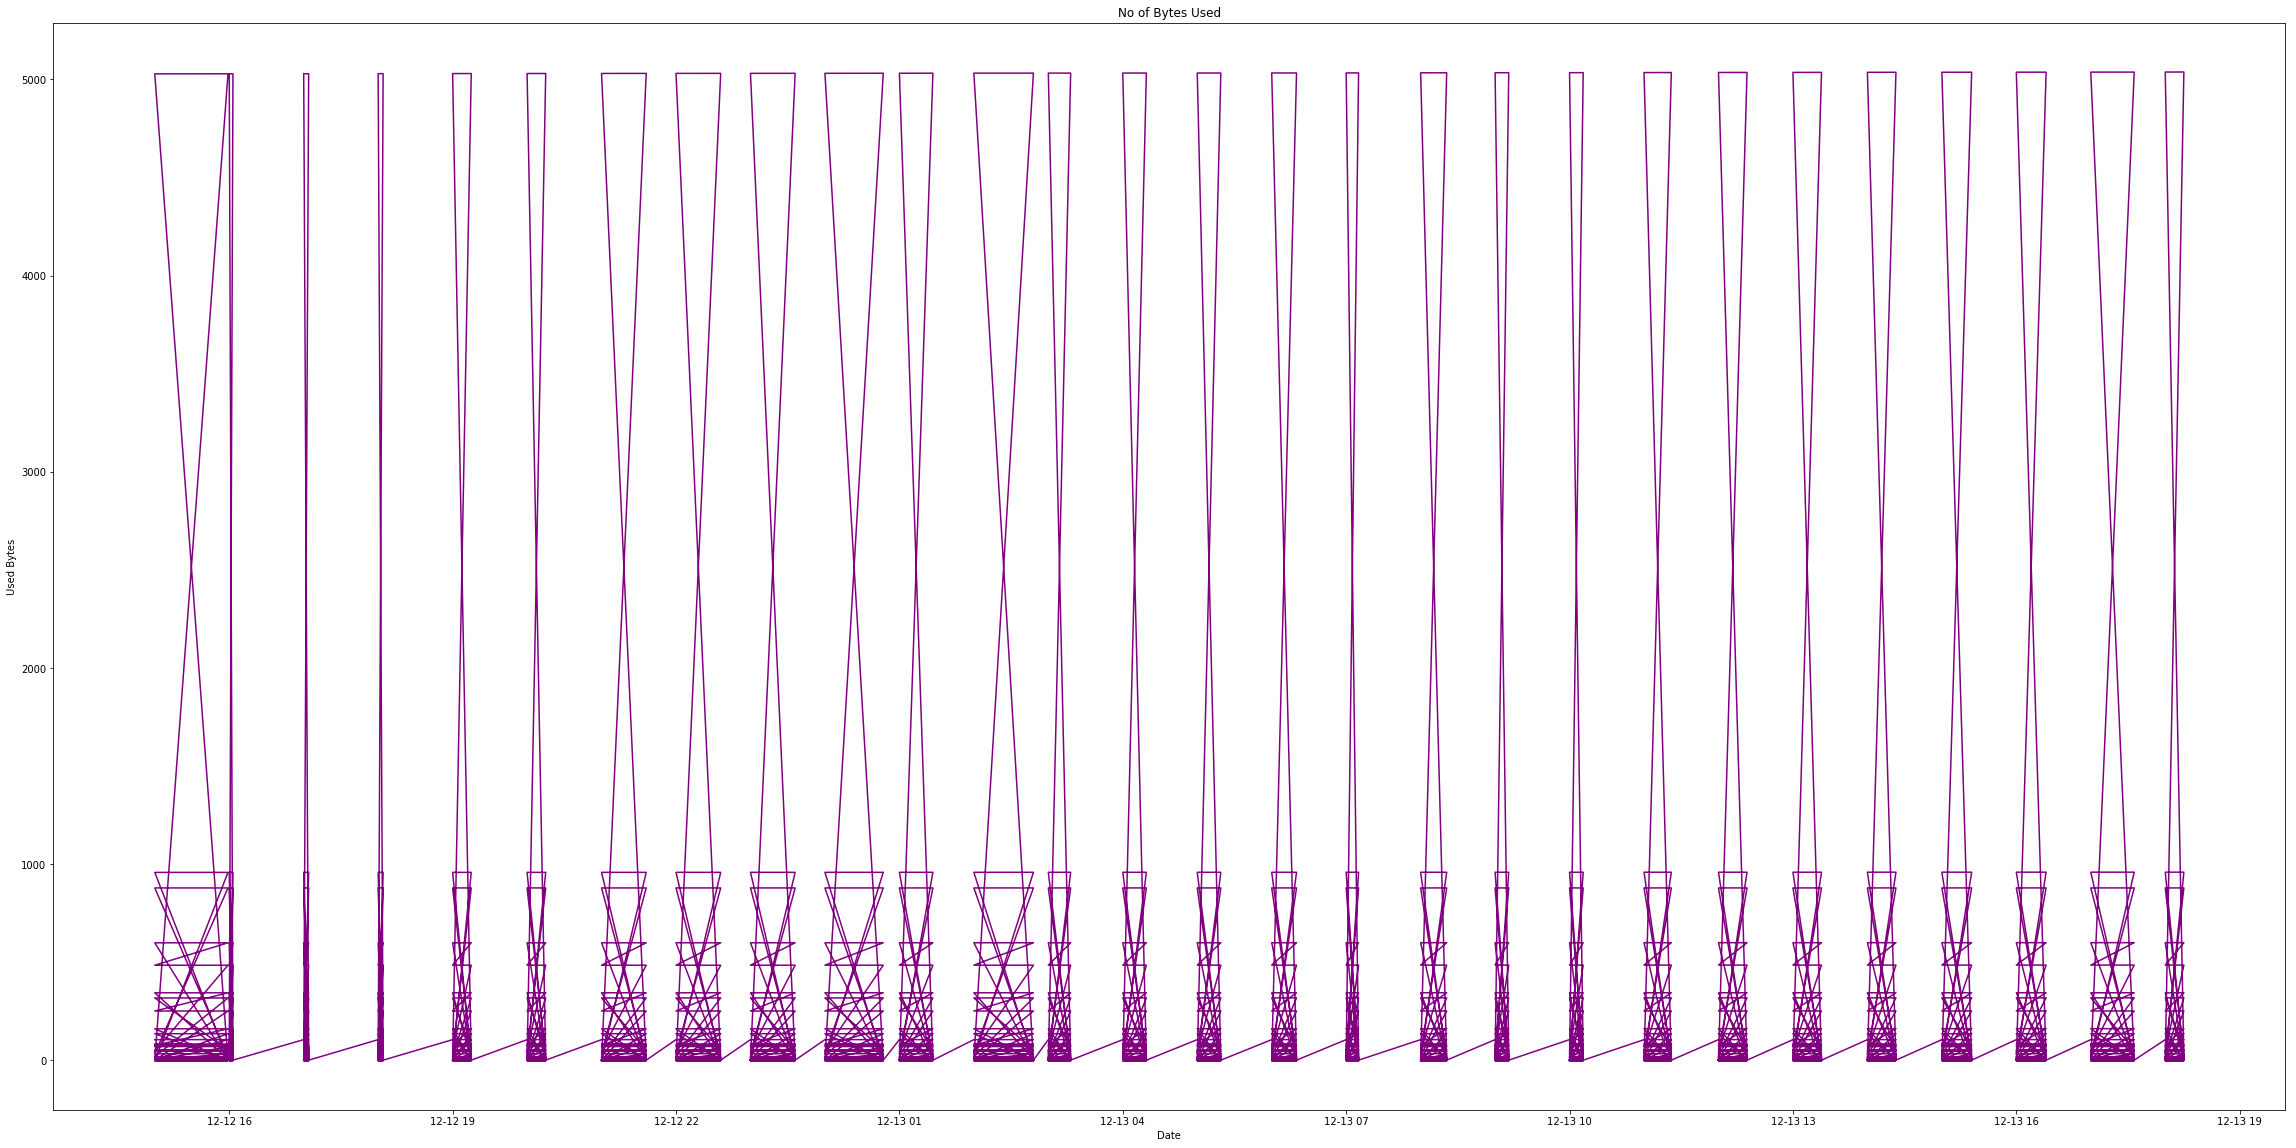

In [56]:
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(40, 20))

# Add the x-axis and the y-axis to the plot
ax.plot(selecteddf['Date'],
        selecteddf['writeTeraBytes'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Used Bytes",
       title="No of Bytes Used")


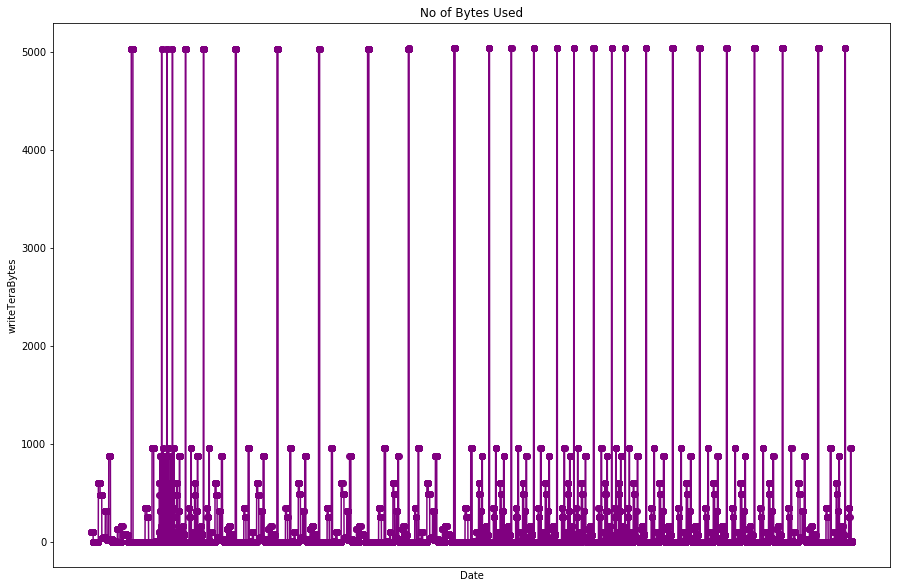

In [23]:
#selecteddf.set_index('Date',inplace=True)
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(15, 10))

# Add the x-axis and the y-axis to the plot
ax.plot(selecteddf.Date.index.values,
        selecteddf['writeTeraBytes'], '-o',
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="writeTeraBytes",
       title="No of Bytes Used")

# Clean up the x axis dates (reviewed in lesson 4)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%d/%H"))#%m/

plt.show()



0       2019-12-12 15:00:00
1       2019-12-12 15:01:00
2       2019-12-12 15:02:00
3       2019-12-12 15:03:00
4       2019-12-12 15:04:00
5       2019-12-12 15:05:00
6       2019-12-12 15:06:00
7       2019-12-12 15:07:00
8       2019-12-12 15:08:00
9       2019-12-12 15:09:00
10      2019-12-12 15:10:00
11      2019-12-12 15:11:00
12      2019-12-12 15:12:00
13      2019-12-12 15:13:00
14      2019-12-12 15:14:00
15      2019-12-12 15:15:00
16      2019-12-12 15:16:00
17      2019-12-12 15:17:00
18      2019-12-12 15:18:00
19      2019-12-12 15:19:00
20      2019-12-12 15:20:00
21      2019-12-12 15:21:00
22      2019-12-12 15:22:00
23      2019-12-12 15:23:00
24      2019-12-12 15:24:00
25      2019-12-12 15:25:00
26      2019-12-12 15:26:00
27      2019-12-12 15:27:00
28      2019-12-12 15:28:00
29      2019-12-12 15:29:00
                ...        
26334   2019-12-13 18:02:00
26335   2019-12-13 18:03:00
26336   2019-12-13 18:04:00
26337   2019-12-13 18:05:00
26338   2019-12-13 1

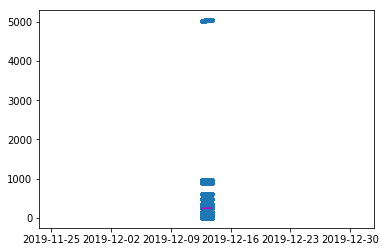

'"\nregr.fit (x_train, y_train)\n\n#Retrieve the intercept a\n\nprint("Intercept Value %.2f"% regr.intercept_)\n\n#Retrieve the coefficients/slope b\n\nprint(regr.coef_)\n\n#y_hat= regr.predict(test[\'Date\'],[\'TotalBytesUsed\'])\ny_hat= regr.predict(test.iloc[:,[4]]) \n\nx = np.asanyarray(test[[\'writeTeraBytes\']])\ny = np.asanyarray(test[[\'minute\']])\nprint("Residual sum of squares: %.2f"\n      % np.mean((y_hat - y) ** 2))\n\n# Explained variance score: 1 is perfect prediction\nprint(\'Variance score: %.2f\' % regr.score(x, y))'

In [389]:
date = selecteddf['Date']

print(date)
msk = np.random.rand(len(df)) < 0.8
train = selecteddf[msk]
test = selecteddf[~msk]
regr = linear_model.LinearRegression()
#selecteddf.iloc[:,[4]]
x_train = np.asanyarray(train.iloc[:,[0]])#train['minute'])
y = np.asanyarray(train['writeTeraBytes'])
x_test = np.asanyarray(test.iloc[:,[0]])#train['minute'])
y_test = np.asanyarray(test['writeTeraBytes'])
#print(x_train.shape)  

x = np.c_[x_train]
print(x)
polynomial_features = PolynomialFeatures(degree=3)
s_poly = polynomial_features.fit_transform(x)

#linear_model = LinearRegression()
regr.fit(s_poly, y)
y_poly_pred = regr.predict(s_poly)

plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()

""""
regr.fit (x_train, y_train)

#Retrieve the intercept a

print("Intercept Value %.2f"% regr.intercept_)

#Retrieve the coefficients/slope b

print(regr.coef_)

#y_hat= regr.predict(test['Date'],['TotalBytesUsed'])
y_hat= regr.predict(test.iloc[:,[4]]) 

x = np.asanyarray(test[['writeTeraBytes']])
y = np.asanyarray(test[['minute']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))"""

       hour
0        15
1        15
2        15
3        15
4        15
5        15
6        15
7        15
8        15
9        15
10       15
11       15
12       15
13       15
14       15
15       15
16       15
17       15
18       15
19       15
20       15
21       15
22       15
23       15
24       15
25       15
26       15
27       15
28       15
29       15
...     ...
26334    18
26335    18
26336    18
26337    18
26338    18
26339    18
26340    18
26341    18
26342    18
26343    18
26344    18
26345    18
26346    18
26347    18
26348    18
26349    18
26350    18
26351    18
26352    18
26353    18
26354    18
26355    18
26356    18
26357    18
26358    18
26359    18
26360    18
26361    18
26362    18
26363    18

[26364 rows x 1 columns]
-0.00021975202031376817
Intercept 251.60
Coefficients/Slope -0.05
[250.57602036 250.90239669 250.52939517 ... 250.76252112 250.94902188
 250.52939517]
('Mean Absolute Error', 343.82936393581866)
('Mean Squared Error', 607182.55222

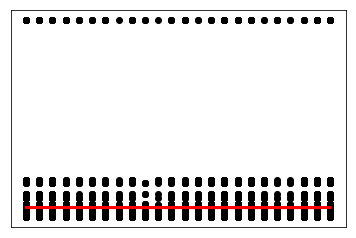

In [44]:
#Simple linear regression
#selecteddf['Date'].astype('float64[D]').dtype

x = selecteddf.iloc[:,[3]]
print(x)

y = selecteddf['writeTeraBytes']


#Divide the data into train and test sets: 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
""""

# Have a glance at the shape of the train and test sets:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

"""
                    
#Train the algorithm:
regr = linear_model.LinearRegression()
regr.fit (x_train, y_train)

print(regr.score(x_test,y_test))

#Retrieve the intercept a

print('Intercept %.2f'%regr.intercept_)

#Retrieve the coefficients/slope b

print('Coefficients/Slope %.2f'%regr.coef_)

#Predicted value
y_train_pred = regr.predict(x_train)
#y_test_pred = regr.predict(x_test)
y_pred = regr.predict(x_test)
#y_pred = pd.DataFrame(y_pred,columns=['Predicated'])
print(y_pred)
#print(y_test)

# The coefficient of determination: 1 is perfect prediction
#print('Coefficient of determination: %.2f'
#      % r2_score(y_test, y_pred))

print("Mean Absolute Error",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

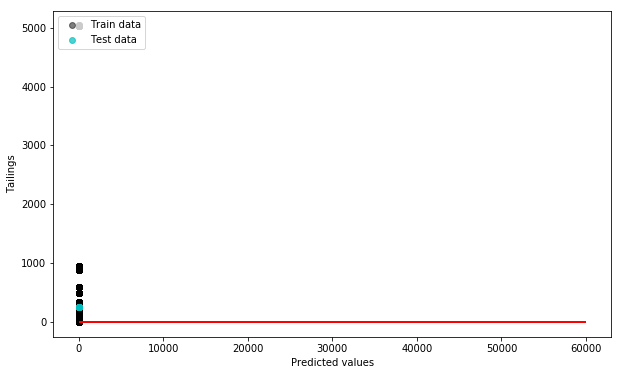

In [43]:
#y_train_pred = regr.predict(x_train)
#y_test_pred = regr.predict(x_test)
#y_pred = regr.predict(x_test)
plt.figure(figsize=(10,6))

plt.scatter(x_test,y_test,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test,y_pred,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

In [31]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))



MSE train data: 667546.276, MSE test data: 608264.687
R2 train data: 0.000, R2 test data: -0.002


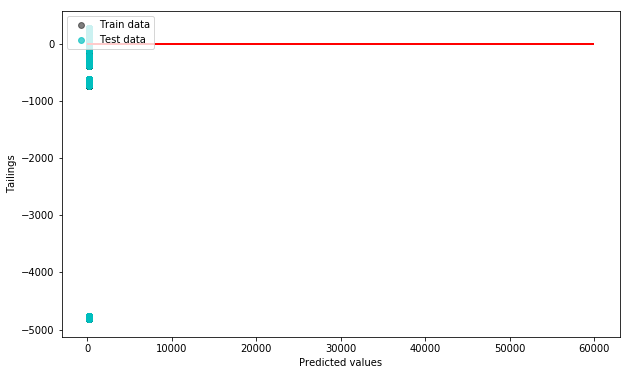

In [37]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

In [ ]:
n=len(df['Hours'])
df1 = pd.DataFrame()
df1.insert(0, 'Hours',0)
df1.insert(1, 'Ideal',0)
time=0
time1=0
time2=0
RdDataFrmpos=0
DataFrmPos=0
Timediff1=0


   
def timevalues(RdDataFrmpos):
    for id1, id2 in izip(df.ix[RdDataFrmpos:].iterrows(),df.ix[RdDataFrmpos+1:].iterrows()):
        time1 =int(id1[1]['Hours'])
        time2 =int(id2[1]['Hours'])
        time=time2-time1
        #print("time",time,"time1",time1,"time2",time2)
        return time,time1,time2


def Write2DataFrame(Timediff,Time1,Time2,DataFrmPos):
    if(Timediff!=1):

            Tim1= 23-Time1
            Tim2= Time2-0
            Timediff1=Tim1+Tim2
            #print("Timediff!=1")
            df1.at[DataFrmPos,'Hours']= Time1
            df1.at[DataFrmPos,'Ideal']= 0
            #print("Inserted Time=",Time1,"at position ",DataFrmPos)
            #print(df1)
            Time1=Time1+1
            DataFrmPos=DataFrmPos+1
           
            #print("Tim1=",Tim1,"Tim2=",Tim2,"Timediff=",Timediff1)
            k=0
            for k in range(0, Timediff1):
                #print("inside for loop  Timediff",Timediff1)
                if(Time1==24):
                    Time1=0
                    #print("Set time1 value to",Time1)
               
                #print("Writting to DataFrame with Time1=",Time1,"at DataFrmPos ",DataFrmPos)
                df1.at[DataFrmPos,'Hours']= Time1
                df1.at[DataFrmPos,'Ideal']= 1
                #print(df1)
                Time1=Time1+1
                DataFrmPos=DataFrmPos+1
                #print("DataFrmPos=",DataFrmPos,"Time1=",Time1)
               
            #position=position-Timediff1      
    elif(Timediff==1):
            #df1.insert(0, 'Hours',time)
            #df1.insert(1, 'busy',0)
            #print("Timediff==1")
            #print("Inserted Time=",Time1,"at position ",DataFrmPos)
            df1.at[DataFrmPos,'Hours']= Time1
            df1.at[DataFrmPos,'Ideal']= 0
            #print(Timediff)
            DataFrmPos=DataFrmPos+1
   
    #print("Returning DataFrmPos value",DataFrmPos)      
    return DataFrmPos
   
   
#for pos in range(0, n-1):
while RdDataFrmpos < n-1:
    #i=0
    #j=i+1
    #print(" In for loop Started with RdDataFrmpos value",RdDataFrmpos)
    #print(time1,time2,time,n)
    #timevalues(i,j)
    time,time1,time2=timevalues(RdDataFrmpos)
    #print("After function call time = ",time,"Time1 = ",time1,"Time2 = ",time2,"RdDataFrmpos ",RdDataFrmpos)
    #print(time,time1,time2,n)
    DataFrmPos=Write2DataFrame(time,time1,time2,DataFrmPos)
    #print("DataFrmPos value ",DataFrmPos)
    #print("At the end RdDataFrmpos value",RdDataFrmpos)
    RdDataFrmpos=RdDataFrmpos+1
    #print("After incre pos value",RdDataFrmpos)
    #print id1[1]['Hours']
   
    #print id2[1]['Hours']
    #time1 = df.at[n,'Hours']
   
    #time2 = df.at[n,'Hours'].shift(+1)
    #time1 =int(id1[1]['Hours'])
    #time2 =int(id2[1]['Hours'])
    #time=time2-time1
    #print(time1,time2,time,n)
   
       
#print("End of for")


   

           
print(df1.head(50))

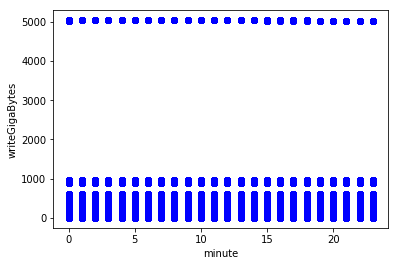

In [36]:
plt.scatter(selecteddf.hour, selecteddf.writeTeraBytes,  color='blue')
plt.xlabel("minute")
plt.ylabel("writeGigaBytes")
plt.show()

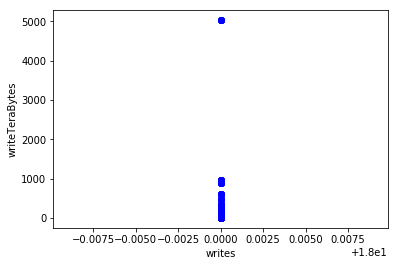

In [38]:
plt.scatter(selecteddf.hour, selecteddf.writeTeraBytes,  color='blue')
plt.xlabel("writes")
plt.ylabel("writeTeraBytes")
plt.show()

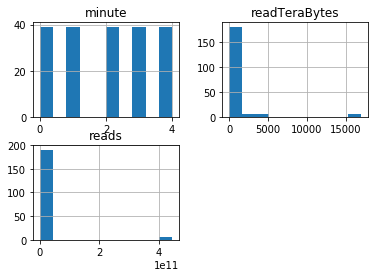

In [39]:
viz = selecteddf[['minute','reads','readTeraBytes']]
viz.hist()
plt.show()


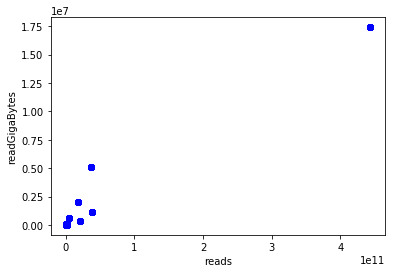

In [221]:
plt.scatter(selecteddf.reads, selecteddf.readTeraBytes,  color='blue')
plt.xlabel("reads",)
plt.ylabel("readTeraBytes")
plt.show()

In [ ]:

import datetime

now = datetime.datetime.now()


print
print "Current date and time using str method of datetime object:"
print str(now)

print
print "Current date and time using instance attributes:"
print "Current year: %d" % now.year
print "Current month: %d" % now.month
print "Current day: %d" % now.day
print "Current hour: %d" % now.hour
print "Current minute: %d" % now.minute
print "Current second: %d" % now.second
print "Current microsecond: %d" % now.microsecond

print
print "Current date and time using strftime:"
print now.strftime("%Y-%m-%d %H:%M")

print
print "Current date and time using isoformat:"
print now.isoformat()
print
print "current date"
print now.strftime("%Y-%m-%d")
date=now.strftime("%Y-%m-%d")
time=now.hour
print time
if 'Ideal' in df.columns:
    print("do nothing")
else:
    df.insert(1, "Ideal", 0)

for i in range(0, 25):
    if(i==time):
        Ideal="0"
       # df.iloc.insert[i,1]
       # df.insert(1, 'Date', df1)
        #df.insert(1, 'busy',1)
        df.at[i,'Ideal']= 1
       
        print(i)
    else:
        #Ideal="1"
        #df.insert(1, 'busy',0)
        
        print("this is not a busy time")
  
 # inserting new column with values of list made above       


df.head(663)



  
          
        
 
    

In [169]:
from sklearn.model_selection import train_test_split
print(y)
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters
drugTree.fit(X_trainset,y_trainset)
predTree = drugTree.predict(X_testset)

      TotalBytesUsed
0    116224738573824
1    116225873821184
2    116227007520256
3    116228143070720
4    116229276782080
5    116230413078016
6    116231544716800
7    116232696495616
8    116233842327040
9    116234987146752
10   116236117470720
11   116237250776576
12   116238385843712
13   116239517462016
14   116240647650816
15   116241782709760
16   116242916482560
17     6567436292096
18     6567700860928
19     6567968505856
20     6568236138496
21     6568500736000
22     6568768520192
23     6569037242368
24     6569305104384
25     6569569660928
26     6569844838400
27     6570113204224
28     6570377740288
29     6570645196800
..               ...
633   13661138423808
634   13661187719168
635   13661231276032
636   13661274775552
637   13661320392704
638   13661365780480
639   13661413134336
640   13661467435008
641   13661510950912
642   13661553668096
643   13661596917760
644   13661640445952
645   13661683712000
646    1273987522560
647    1273987522560
648    127398

In [167]:
print (predTree [0:5])
print (y_testset [0:5])

[0 0 0 0 0]
      TotalBytesUsed
293  176526751361536
563      29907300352
347   77443862933504
384        150253568
522    5541959598080
